HW2 : Q2: Car Classification: dataset analysis:

In [1]:
import glob
import os

dataset_path = "toyota_image_dataset_v2/toyota_cars"
folders = glob.glob(dataset_path+'/*') # to get classes path, output is :'toyota_image_dataset_v2/toyota_cars/aygo', 'toyota_image_dataset_v2/toyota_cars/highlander', .....
classes = [folder.split('/')[-1] for folder in folders] # extract class names

classes_data = {}
for class_ in classes:
    class_images = glob.glob(os.path.join(dataset_path, class_, '*'))
    classes_data[class_]=len(class_images)


sorted_classes = dict(sorted(classes_data.items(), key=lambda item: item[1], reverse=True))
print(sorted_classes)

{'corolla': 2311, 'camry': 2246, 'rav4': 1786, 'tacoma': 1318, 'highlander': 1119, 'prius': 1039, 'tundra': 1035, '4runner': 946, 'yaris': 844, 'sienna': 652, 'avalon': 497, 'hilux': 435, 'fortuner': 254, 'supra': 173, 'avensis': 167, 'sequoia': 166, 'revo': 162, 'vios': 141, 'venza': 122, 'innova': 121, 'verso': 112, 'aygo': 109, 'vitz': 102, 'celica': 101, 'crown': 77, 'hiace': 75, 'etios': 74, 'corona': 70, 'alphard': 64, 'matrix': 63, 'avanza': 63, 'mirai': 57, 'soarer': 48, 'starlet': 48, 'previa': 44, 'estima': 32, 'iq': 27, 'rush': 23}


2-2: Define cars lables:

In [2]:
car_labels = {}
for i , class_ in enumerate(classes_data.keys()):
    car_labels[i]=class_

print(car_labels)

{0: 'aygo', 1: 'highlander', 2: 'alphard', 3: 'corona', 4: 'estima', 5: 'sequoia', 6: 'matrix', 7: 'vitz', 8: 'previa', 9: 'mirai', 10: 'venza', 11: 'camry', 12: 'verso', 13: 'soarer', 14: 'iq', 15: 'avalon', 16: 'tundra', 17: 'vios', 18: 'hiace', 19: 'hilux', 20: 'avensis', 21: 'prius', 22: 'innova', 23: 'rav4', 24: 'tacoma', 25: 'yaris', 26: 'rush', 27: 'fortuner', 28: '4runner', 29: 'starlet', 30: 'corolla', 31: 'etios', 32: 'supra', 33: 'crown', 34: 'avanza', 35: 'sienna', 36: 'celica', 37: 'revo'}


2-2: frequency plot:


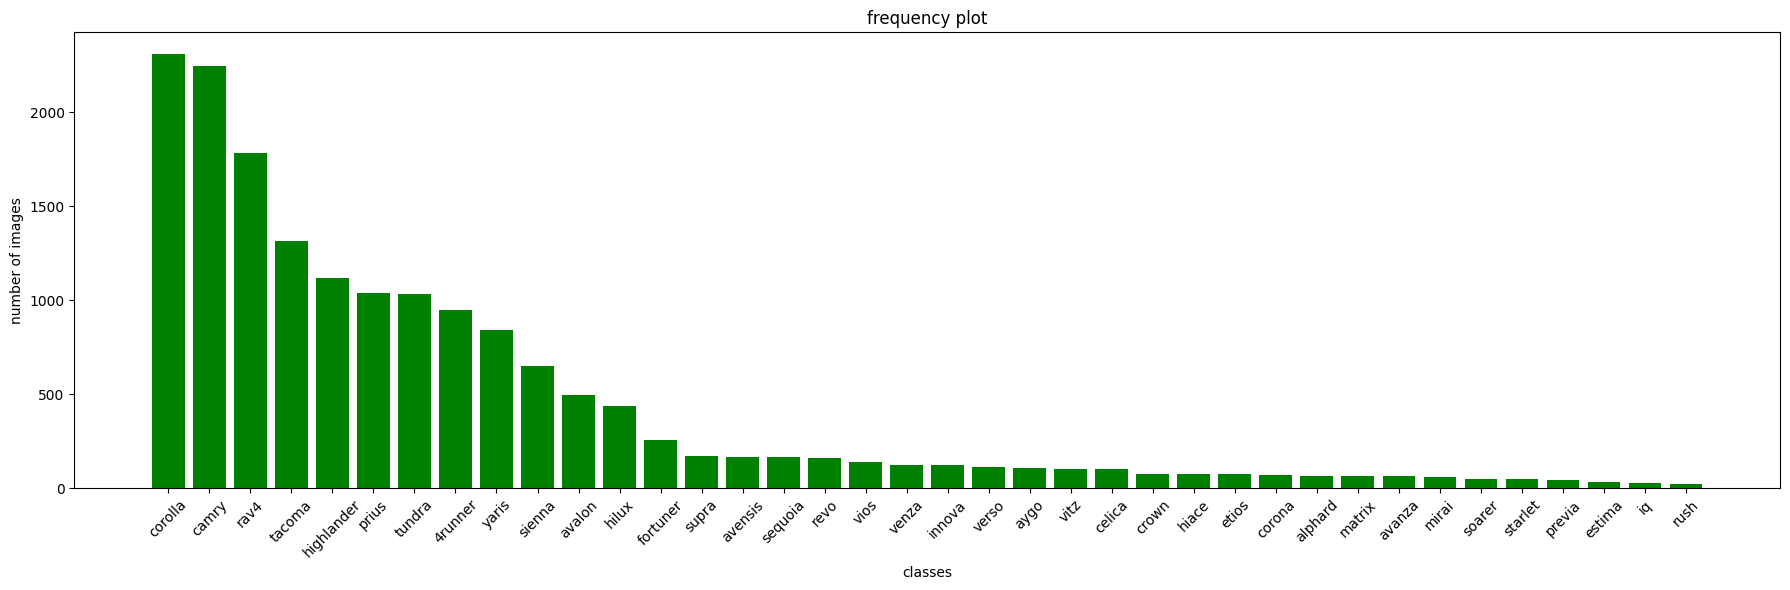

In [3]:
import matplotlib.pyplot as plt

classes = list(sorted_classes.keys())
class_counts = list(sorted_classes.values())

plt.figure(figsize=(18, 6))
plt.bar(classes, class_counts, color='green')
plt.xticks(rotation=45)
plt.xlabel("classes")
plt.ylabel("number of images")
plt.title("frequency plot")
plt.tight_layout()
plt.show()


2-2: Select models and create the new dataset with data augmentation:

In [4]:
import numpy as np
from PIL import Image
import shutil
################ run setups:
num_epochs = 20
# selected_classes = ['aygo', 'vios', 'etios']
selected_classes = ['prius','hilux','alphard','aygo', 'etios','supra', 'rav4', 'camry', 'iq', 'highlander']
# selected_classes = ['hilux','alphard','aygo', 'etios', 'revo', 'iq']
#################
output_path = os.path.join('normalized_selected_car_image')
if os.path.exists(output_path):
    shutil.rmtree(output_path)
    print("directrory removed")
    
os.makedirs(output_path, exist_ok=True)



for class_ in selected_classes:
    source_folder = os.path.join(dataset_path, class_)
    distiination_folder = os.path.join(output_path, class_)
    os.makedirs(distiination_folder, exist_ok=True)

    image_paths = glob.glob(os.path.join(source_folder, '*'))

    for img_path in image_paths:
        try: # because some images have problems, likely not downloaded well or have source problems. this tru and Exception helps to handle it
            img = Image.open(img_path).convert('RGB')
            img = img.resize((224, 224))

            img_array = np.array(img) / 255.0  # normalizeation

            base_name = os.path.splitext(os.path.basename(img_path))[0]
            npy_path = os.path.join(distiination_folder, base_name + '.npy') # .npy because it can not be saved as jpg. this format is supported by numpy
            np.save(npy_path, img_array)

        except Exception as e:
            print(f"error processing {img_path}: {e}") 


# Data Augmentation:
from torchvision import transforms
import random

# find the original image number for each selected class:
original_image_number = []

for class_ in selected_classes:
    original_image_number.append(classes_data[class_])

max_image_number = max(original_image_number) 
print(f"selected classes image numbers are: {original_image_number}")
print(f"max number is: {max_image_number}")

augmentations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.3, contrast=0.2),
])


for i, class_ in enumerate(selected_classes):
    class_folder = os.path.join(output_path, class_)
    images = glob.glob(os.path.join(class_folder, '*.npy'))
    image_number = original_image_number[i]

    needed = max_image_number - image_number

    for i in range(needed):
        print(f"augmenting data for {class_}--->>{needed - i} left to augment")
        src_path = random.choice(images)
        img_array = np.load(src_path)
        img = Image.fromarray((img_array * 255).astype(np.uint8))

        augmented_img = augmentations(img)
        augmented_array = np.array(augmented_img) / 255.0 # normalizeation
        

        new_name = f"{os.path.splitext(os.path.basename(src_path))[0]}_aug{i}.npy"
        np.save(os.path.join(class_folder, new_name), augmented_array)

    print(f"for class {class_}, {needed} images created")


selected_car_labels = {}
for i , class_ in enumerate(sorted(selected_classes)):
    selected_car_labels[i]=class_

print(selected_car_labels)

directrory removed
error processing toyota_image_dataset_v2/toyota_cars/alphard/alphard-1680909983.jpg: cannot identify image file '/home/ali/Desktop/HW2/toyota_image_dataset_v2/toyota_cars/alphard/alphard-1680909983.jpg'
error processing toyota_image_dataset_v2/toyota_cars/aygo/aygo-1451867426.jpg: cannot identify image file '/home/ali/Desktop/HW2/toyota_image_dataset_v2/toyota_cars/aygo/aygo-1451867426.jpg'
error processing toyota_image_dataset_v2/toyota_cars/supra/supra-1715664928.jpg: cannot identify image file '/home/ali/Desktop/HW2/toyota_image_dataset_v2/toyota_cars/supra/supra-1715664928.jpg'


/home/ali/anaconda3/envs/poseEstimation/lib/python3.13/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


error processing toyota_image_dataset_v2/toyota_cars/camry/camry-1361471237.jpg: cannot identify image file '/home/ali/Desktop/HW2/toyota_image_dataset_v2/toyota_cars/camry/camry-1361471237.jpg'
selected classes image numbers are: [1039, 435, 64, 109, 74, 173, 1786, 2246, 27, 1119]
max number is: 2246
augmenting data for prius--->>1207 left to augment
augmenting data for prius--->>1206 left to augment
augmenting data for prius--->>1205 left to augment
augmenting data for prius--->>1204 left to augment
augmenting data for prius--->>1203 left to augment
augmenting data for prius--->>1202 left to augment
augmenting data for prius--->>1201 left to augment
augmenting data for prius--->>1200 left to augment
augmenting data for prius--->>1199 left to augment
augmenting data for prius--->>1198 left to augment
augmenting data for prius--->>1197 left to augment
augmenting data for prius--->>1196 left to augment
augmenting data for prius--->>1195 left to augment
augmenting data for prius--->>1194

2-2: Show a sample of augmented images:

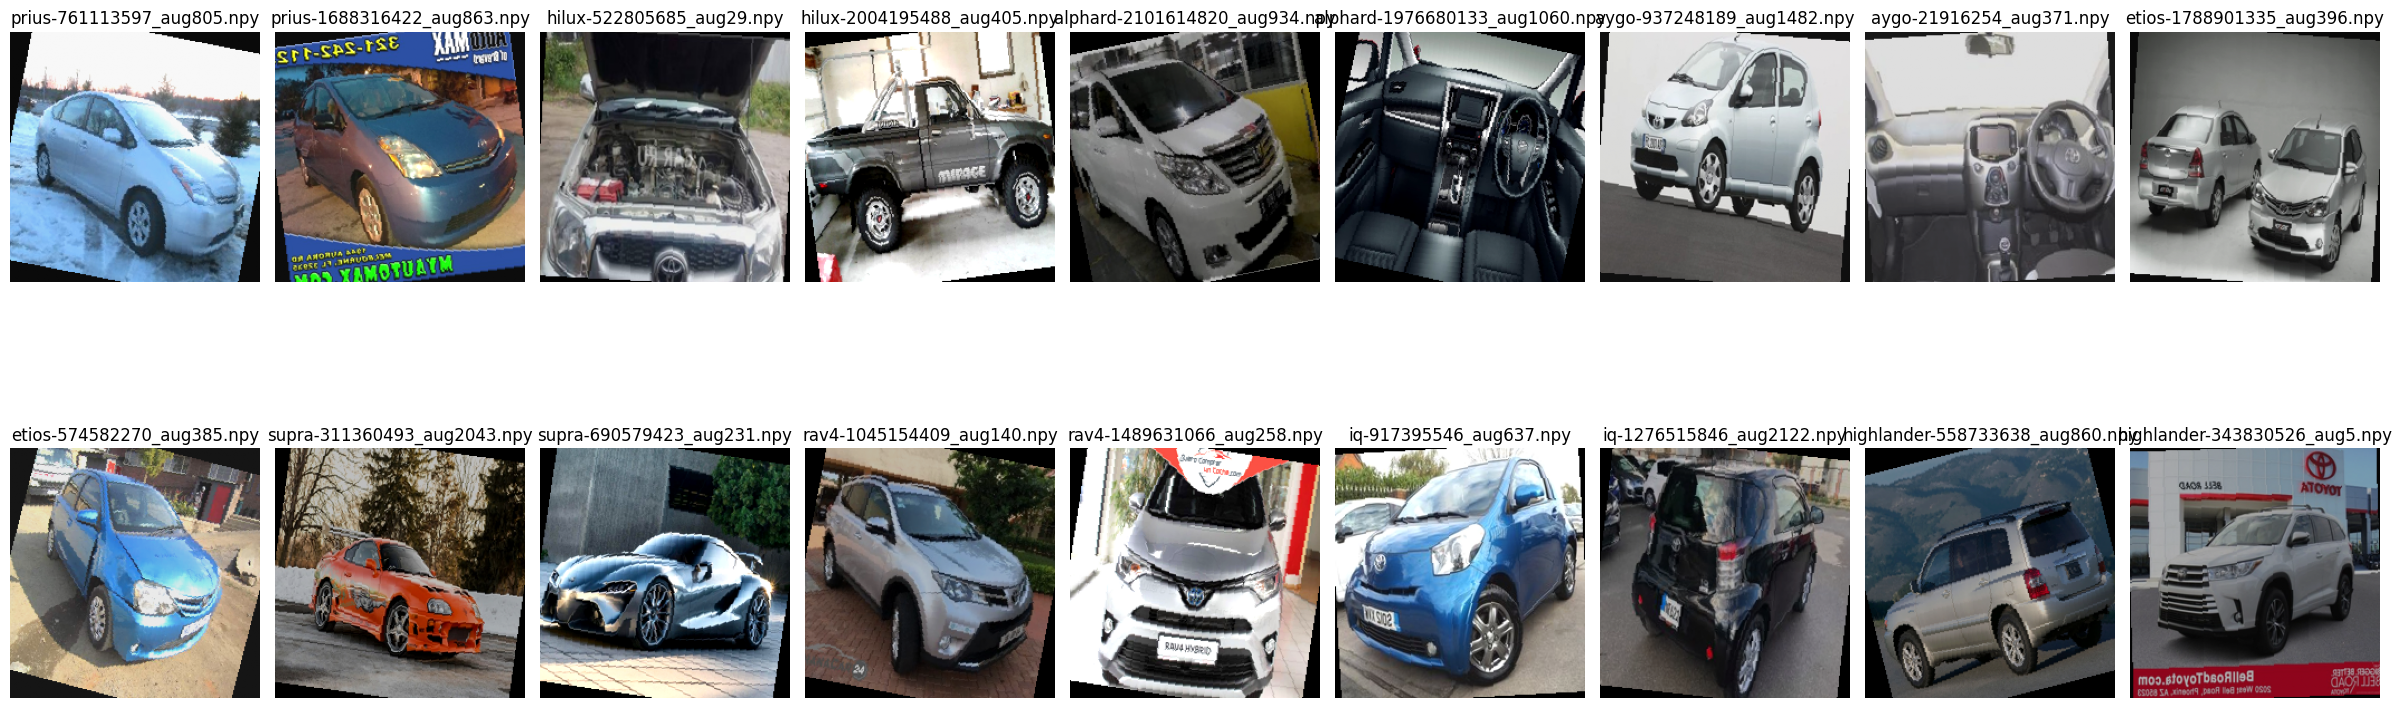

In [5]:
sample_images= []
for i, class_ in enumerate(selected_classes):
        class_folder = os.path.join(output_path, class_)
        aug_images = glob.glob(os.path.join(class_folder, '*_aug*.npy'))
        sample_images += random.sample(aug_images, min(2, len(aug_images))) 
        
plt.figure(figsize=(24, 10))
for i, img_path in enumerate(sample_images):
    img_array = np.load(img_path)
    plt.subplot( 2,round(len(sample_images)/2), i+1)
    plt.imshow(img_array)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
plt.tight_layout()
plt.show()

2-2: Create Train-test Dataset:

In [6]:
from sklearn.model_selection import train_test_split
input_dir = output_path # where normalized images are saved
train_test_folder = 'train_test_folder' # where the train-test images are saved

if os.path.exists(train_test_folder):
    shutil.rmtree(train_test_folder)
    print(f"{train_test_folder} directrory removed")



for class_ in os.listdir(input_dir):
    class_folder = os.path.join(input_dir, class_)
    image_paths = glob.glob(os.path.join(class_folder, '*.npy'))

    train_imgs, test_imgs = train_test_split(image_paths, test_size=0.2, random_state=42)

    for split, split_imgs in zip(['train', 'test'], [train_imgs, test_imgs]):
        split_dir = os.path.join(train_test_folder, split, class_)
        os.makedirs(split_dir, exist_ok=True)
        for img_path in split_imgs:
            shutil.copy(img_path, os.path.join(split_dir, os.path.basename(img_path)))


train_test_folder directrory removed


2-3: data extraction: Define VGG16 and AlexNet without fully connected layers: First import vgg16 and alexnet and see their last layers:

In [7]:
import torch
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
# Load models
vgg16 = models.vgg16(pretrained=True)
alexnet = models.alexnet(pretrained=True)

vgg16.eval()

cuda


/home/ali/anaconda3/envs/poseEstimation/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ali/anaconda3/envs/poseEstimation/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/ali/anaconda3/envs/poseEstimation/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

2-3: data extraction:Define VGG16 and AlexNet without fully connected layers: Remove fully-connected parts:

In [9]:
import torch
import torchvision.models as models
import torch.nn as nn

vgg16 = models.vgg16(pretrained=True)
alexnet = models.alexnet(pretrained=True)

# Remove classifier
# vgg16_features = nn.Sequential(*list(vgg16.features.children()))
# alexnet_features = nn.Sequential(*list(alexnet.features.children()))

vgg16_new=vgg16.features
alexnet_new=alexnet.features

# Set to eval mode

vgg16_new.eval()

vgg16_new.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [10]:
alexnet_new.eval()
alexnet_new.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

2-3: data extraction: Define dataset and dataloader:

In [11]:
from torch.utils.data import Dataset, DataLoader
class image_dataset(Dataset):
    def __init__(self, dataset_directory):
        self.samples = []
        self.labels = []  
        self.class_idx = {cls: i for i, cls in enumerate(sorted(os.listdir(dataset_directory)))} # indexing classes

        for class_ in self.class_idx:
            class_folder = os.path.join(dataset_directory, class_)
            for file in os.listdir(class_folder):
                if file.endswith('.npy'):
                    self.samples.append(os.path.join(class_folder, file))
                    self.labels.append(self.class_idx[class_])

    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        image = np.load(self.samples[idx])
        image_tensor = torch.tensor(image).permute(2, 0, 1).float()
        label = self.labels[idx]
        return image_tensor, label

2-3: data extraction: Define feature extractor function:

In [12]:
def feature_extractor (model, dataloader, save_dir, model_name, selected_car_labels):
    if os.path.exists(save_dir):
        shutil.rmtree(save_dir)
        print(f"{save_dir} directrory removed")
    
    os.makedirs(save_dir, exist_ok=True)

    with torch.no_grad():
        for i, (imgs, labels) in enumerate(dataloader): # this one load a batch
            imgs = imgs.to(device)
            features = model(imgs).cpu().numpy()

            

            for j in range(len(imgs)):
                label = labels[j].item()
                car_name = selected_car_labels[label]

                os.makedirs(os.path.join(save_dir, car_name), exist_ok=True)
                out_path = os.path.join(save_dir, car_name ,f"{model_name}_feature_{i}_{j}.npy")
                
                feature = features[j]
                if j+1 == len(imgs):
                    print(np.shape(feature))

                np.save(out_path, feature.flatten())# to flatten


                
            print(f"{(i*dataloader.batch_size+len(imgs))*100/(dataloader.dataset.__len__()):.2f} % remain --->>> {labels.cpu().numpy()}") # track the process    

            

2-3: data extraction: extracting features:

In [13]:
batch_size = 30
train_dataset_path ='train_test_folder/train'
test_dataset_path ='train_test_folder/test'

train_dataset=image_dataset(train_dataset_path)
test_dataset=image_dataset(test_dataset_path)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

train_features_path_vgg = 'train_test_features/vgg/train'
test_features_path_vgg = 'train_test_features/vgg/test'

train_features_path_alexnet = 'train_test_features/alexnet/train'
test_features_path_alexnet = 'train_test_features/alexnet/test'

feature_extractor(vgg16_new, test_dataloader, test_features_path_vgg, 'vgg16' , selected_car_labels)
feature_extractor(vgg16_new, train_dataloader, train_features_path_vgg, 'vgg16' , selected_car_labels)

feature_extractor(alexnet_new, test_dataloader, test_features_path_alexnet, 'alexnet' , selected_car_labels)
feature_extractor(alexnet_new, train_dataloader, train_features_path_alexnet, 'alexnet' , selected_car_labels)


train_test_features/vgg/test directrory removed
(512, 7, 7)
0.67 % remain --->>> [9 4 4 8 4 6 6 0 7 6 2 7 9 5 9 2 7 7 9 3 5 9 6 9 1 4 9 5 3 1]
(512, 7, 7)
1.33 % remain --->>> [8 9 6 5 7 0 3 2 5 9 7 1 2 1 0 2 5 5 1 8 9 0 6 6 5 1 1 3 9 5]
(512, 7, 7)
2.00 % remain --->>> [5 6 6 3 5 8 6 2 6 5 4 4 3 0 1 6 2 0 3 5 6 9 2 1 0 2 6 0 6 8]
(512, 7, 7)
2.67 % remain --->>> [5 1 8 4 2 1 1 6 2 4 1 4 7 1 4 3 2 2 6 2 2 8 9 4 9 3 9 0 3 6]
(512, 7, 7)
3.34 % remain --->>> [6 5 5 5 4 8 0 2 4 1 9 8 0 3 4 2 0 9 8 4 6 0 8 6 7 5 2 6 3 8]
(512, 7, 7)
4.00 % remain --->>> [7 5 6 0 2 4 7 8 0 7 8 8 9 6 1 8 9 4 8 2 5 5 1 7 8 8 6 4 3 0]
(512, 7, 7)
4.67 % remain --->>> [5 7 7 6 3 4 6 5 8 3 0 9 7 4 7 8 6 7 8 6 9 3 3 8 9 4 8 1 5 0]
(512, 7, 7)
5.34 % remain --->>> [1 5 3 1 8 1 0 1 4 2 9 0 4 8 9 8 5 0 2 9 9 8 7 0 6 5 6 4 2 4]
(512, 7, 7)
6.01 % remain --->>> [5 9 2 8 1 3 5 4 3 9 2 2 5 7 7 0 5 7 4 2 1 3 3 3 6 3 5 9 0 4]
(512, 7, 7)
6.67 % remain --->>> [7 7 9 7 9 8 1 7 2 8 7 3 2 3 5 4 5 2 5 3 4 5 2 7 9 5 8 4 5 3]
(5

2-4-1: training the classifier part for VGG16 and Alexnet: DataLoader and DataSet:

In [14]:
from torch.utils.data import Dataset, DataLoader
class feature_dataset(Dataset):
    def __init__(self, dataset_directory):
        self.samples = []
        self.labels = []  
        self.class_idx = {cls: i for i, cls in enumerate(sorted(os.listdir(dataset_directory)))} # indexing classes

        for class_ in self.class_idx:
            class_folder = os.path.join(dataset_directory, class_)
            for file in os.listdir(class_folder):
                if file.endswith('.npy'):
                    self.samples.append(os.path.join(class_folder, file))
                    self.labels.append(self.class_idx[class_])

    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        features = np.load(self.samples[idx])
        return torch.tensor(features, dtype=torch.float32), self.labels[idx]

# paths :
train_features_path_vgg = 'train_test_features/vgg/train'
test_features_path_vgg = 'train_test_features/vgg/test'

train_features_path_alexnet = 'train_test_features/alexnet/train'
test_features_path_alexnet = 'train_test_features/alexnet/test'

# datasets:
train_dataset_vgg = feature_dataset(train_features_path_vgg)
test_dataset_vgg = feature_dataset(test_features_path_vgg)
train_dataset_alexnet = feature_dataset(train_features_path_alexnet)
test_dataset_alexnet = feature_dataset(test_features_path_alexnet)



2-4-1: training the classifier part for VGG16 and Alexnet: Define Fully connected layers: **According to above**

alexnet :
  (classifier): Sequential(

    (0): Dropout(p=0.5, inplace=False)

    (1): Linear(in_features=9216, out_features=4096, bias=True)

    (2): ReLU(inplace=True)

    (3): Dropout(p=0.5, inplace=False)

    (4): Linear(in_features=4096, out_features=4096, bias=True)

    (5): ReLU(inplace=True)

    (6): Linear(in_features=4096, out_features=1000, bias=True)



vgg : 
  (classifier): Sequential(

    (0): Linear(in_features=25088, out_features=4096, bias=True)

    (1): ReLU(inplace=True)

    (2): Dropout(p=0.5, inplace=False)

    (3): Linear(in_features=4096, out_features=4096, bias=True)

    (4): ReLU(inplace=True)

    (5): Dropout(p=0.5, inplace=False)

    (6): Linear(in_features=4096, out_features=1000, bias=True)



In [15]:
# alexNEt : 
class alexnetFC(nn.Module):
    def __init__(self, num_classes=10):
        super(alexnetFC, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(9216, 4096, bias= True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # x = x.view(x.size(0), -1)  # flatten input: Although i have done it before, but it was written for some tests
        x = self.fc_layers(x)
        return x
# vgg :     
class vggFC(nn.Module):
    def __init__(self, num_classes=10):
        super(vggFC, self).__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(25088, 4096, bias= True),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5, inplace=False),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # x = x.view(x.size(0), -1)  # flatten input: Although i have done it before, but it was written for some tests
        x = self.fc_layers(x)
        return x

2-4-1:  training the classifier part for VGG16 and Alexnet: Train setups:

In [16]:
import torch.nn.functional as F
import torch.optim as optim
# dataloaders: 
batch_size = 40
train_dataloader_vgg = DataLoader(train_dataset_vgg, batch_size=batch_size, shuffle=True)
test_dataloader_vgg = DataLoader(test_dataset_vgg, batch_size=batch_size, shuffle=True)

train_dataloader_alexnet  = DataLoader(train_dataset_alexnet, batch_size=batch_size, shuffle=True)
test_dataloader_alexnet = DataLoader(test_dataset_alexnet , batch_size=batch_size, shuffle=True)

# define fully vonected networks:
alexnet_fc = alexnetFC(num_classes=len(selected_classes))
alexnet_fc.to(device)
vgg_fc = vggFC(num_classes=len(selected_classes))
vgg_fc.to(device)

# define loss and optimizer:
alexnet_criterion = nn.CrossEntropyLoss()
alexnet_optimizer = optim.Adam(alexnet_fc.parameters(), lr=0.00001)

vgg_criterion = nn.CrossEntropyLoss()
vgg_optimizer = optim.Adam(vgg_fc.parameters(), lr=0.00001)

2-4-1:  training the classifier part for VGG16 and Alexnet: Training part:

In [17]:
import time

# AlexNet: 
for epoch in range(num_epochs):
    t = time.time()
    alexnet_fc.train()
    total_loss = 0
    correct = 0
    total = 0
    for features , labels in train_dataloader_alexnet:
        # features, labels = features.to(device), torch.tensor(labels).to(device)
        features, labels = features.to(device), labels.to(device, dtype=torch.long)
        outputs = alexnet_fc(features)
        
        loss = alexnet_criterion(outputs, labels)

        alexnet_optimizer.zero_grad()

        loss.backward()

        alexnet_optimizer.step()

        total_loss += loss.item()

        #  to calculate predictions and accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.2f}, accuracy= {accuracy:.2F},epoch time= {time.time()-t:.2f}s")

Epoch [1/20], Loss: 819.95, accuracy= 39.74,epoch time= 8.73s
Epoch [2/20], Loss: 500.63, accuracy= 63.16,epoch time= 8.53s
Epoch [3/20], Loss: 389.45, accuracy= 71.38,epoch time= 8.52s
Epoch [4/20], Loss: 322.87, accuracy= 75.92,epoch time= 8.53s
Epoch [5/20], Loss: 283.57, accuracy= 78.79,epoch time= 8.51s
Epoch [6/20], Loss: 256.35, accuracy= 80.68,epoch time= 8.53s
Epoch [7/20], Loss: 232.37, accuracy= 82.27,epoch time= 8.53s
Epoch [8/20], Loss: 216.96, accuracy= 83.32,epoch time= 8.56s
Epoch [9/20], Loss: 198.00, accuracy= 85.13,epoch time= 8.54s
Epoch [10/20], Loss: 187.25, accuracy= 85.59,epoch time= 8.52s
Epoch [11/20], Loss: 177.22, accuracy= 86.35,epoch time= 8.54s
Epoch [12/20], Loss: 165.34, accuracy= 87.35,epoch time= 8.52s
Epoch [13/20], Loss: 158.88, accuracy= 87.71,epoch time= 8.52s
Epoch [14/20], Loss: 149.60, accuracy= 88.66,epoch time= 8.53s
Epoch [15/20], Loss: 142.22, accuracy= 88.95,epoch time= 8.52s
Epoch [16/20], Loss: 134.47, accuracy= 89.61,epoch time= 8.53s
E

In [18]:
# vgg: 
for epoch in range(num_epochs):
    t = time.time()
    vgg_fc.train()
    total_loss = 0
    correct = 0
    total = 0
    for features , labels in train_dataloader_vgg:
        features, labels = features.to(device), torch.tensor(labels).to(device)
        outputs = vgg_fc(features)
        
        loss = vgg_criterion(outputs, labels)

        vgg_optimizer.zero_grad()

        loss.backward()

        vgg_optimizer.step()

        total_loss += loss.item()

        #  to calculate predictions and accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.2f}, accuracy= {accuracy:.2F},epoch time= {time.time()-t:.2f}s")

/tmp/ipykernel_5352/1869784504.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features, labels = features.to(device), torch.tensor(labels).to(device)


Epoch [1/20], Loss: 528.82, accuracy= 65.06,epoch time= 21.98s
Epoch [2/20], Loss: 168.55, accuracy= 89.40,epoch time= 17.43s
Epoch [3/20], Loss: 85.51, accuracy= 95.17,epoch time= 17.44s
Epoch [4/20], Loss: 44.67, accuracy= 97.99,epoch time= 17.43s
Epoch [5/20], Loss: 26.06, accuracy= 99.11,epoch time= 17.50s
Epoch [6/20], Loss: 16.25, accuracy= 99.49,epoch time= 17.62s
Epoch [7/20], Loss: 12.29, accuracy= 99.66,epoch time= 17.56s
Epoch [8/20], Loss: 10.16, accuracy= 99.69,epoch time= 17.54s
Epoch [9/20], Loss: 8.21, accuracy= 99.73,epoch time= 17.54s
Epoch [10/20], Loss: 9.71, accuracy= 99.69,epoch time= 17.54s
Epoch [11/20], Loss: 7.62, accuracy= 99.76,epoch time= 17.54s
Epoch [12/20], Loss: 7.96, accuracy= 99.72,epoch time= 17.52s
Epoch [13/20], Loss: 6.60, accuracy= 99.75,epoch time= 17.51s
Epoch [14/20], Loss: 8.14, accuracy= 99.72,epoch time= 17.53s
Epoch [15/20], Loss: 8.25, accuracy= 99.66,epoch time= 17.55s
Epoch [16/20], Loss: 7.37, accuracy= 99.73,epoch time= 17.55s
Epoch [

2-4-3: an arbitary CNN:

In [19]:
class myCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(myCNN, self).__init__()
        
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, 6, stride=(4, 4), padding=(2, 2)), 
            nn.ReLU(),
            nn.MaxPool2d(4, 4),

            nn.Conv2d(16, 48, kernel_size=3, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(3, 3),                          

            nn.Conv2d(48, 64, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2),   
                                       
        )

        self.fc_layers = nn.Sequential(
            nn.Flatten(),                             
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, num_classes)                  
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [20]:
train_dataset_path ='train_test_folder/train'
test_dataset_path ='train_test_folder/test'

train_dataset=image_dataset(train_dataset_path)
test_dataset=image_dataset(test_dataset_path)


train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
# define my structure:
mycnn = myCNN(num_classes=len(selected_classes))
mycnn.to(device)

mycnn_criterion = nn.CrossEntropyLoss()
mycnn_optimizer = optim.Adam(mycnn.parameters(), lr=0.0001)


for epoch in range(num_epochs):
    t = time.time()
    mycnn.train()
    total_loss = 0
    correct = 0
    total = 0
    for features , labels in train_dataloader:
        features, labels = features.to(device), torch.tensor(labels).to(device)
        outputs = mycnn(features)
        
        loss = mycnn_criterion(outputs, labels)

        mycnn_optimizer.zero_grad()

        loss.backward()

        mycnn_optimizer.step()

        total_loss += loss.item()

        #  to calculate predictions and accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.2f}, accuracy= {accuracy:.2F},epoch time= {time.time()-t:.2f}s")

/tmp/ipykernel_5352/716747095.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features, labels = features.to(device), torch.tensor(labels).to(device)


Epoch [1/20], Loss: 1034.38, accuracy= 10.32,epoch time= 18.53s
Epoch [2/20], Loss: 1017.81, accuracy= 13.79,epoch time= 18.45s
Epoch [3/20], Loss: 956.30, accuracy= 16.93,epoch time= 16.83s
Epoch [4/20], Loss: 928.97, accuracy= 17.95,epoch time= 16.17s
Epoch [5/20], Loss: 916.05, accuracy= 18.89,epoch time= 11.79s
Epoch [6/20], Loss: 905.44, accuracy= 19.26,epoch time= 12.19s
Epoch [7/20], Loss: 895.48, accuracy= 20.25,epoch time= 11.68s
Epoch [8/20], Loss: 886.92, accuracy= 21.41,epoch time= 12.37s
Epoch [9/20], Loss: 877.26, accuracy= 22.66,epoch time= 10.60s
Epoch [10/20], Loss: 867.80, accuracy= 23.64,epoch time= 10.23s
Epoch [11/20], Loss: 857.56, accuracy= 24.95,epoch time= 10.11s
Epoch [12/20], Loss: 846.18, accuracy= 26.36,epoch time= 9.96s
Epoch [13/20], Loss: 832.99, accuracy= 27.84,epoch time= 10.32s
Epoch [14/20], Loss: 818.44, accuracy= 28.99,epoch time= 10.73s
Epoch [15/20], Loss: 803.76, accuracy= 31.03,epoch time= 10.13s
Epoch [16/20], Loss: 788.51, accuracy= 32.63,epo

2-4-4: VGG+SVM:

In [21]:
# extract x and y:
train_features_path_vgg = 'train_test_features/vgg/train'
test_features_path_vgg = 'train_test_features/vgg/test'

def data_extractor(directory):
    x=[]
    y =[]
    class_idx = {cls: i for i, cls in enumerate(sorted(os.listdir(directory)))} # indexing classes
    for class_ in class_idx:
        class_folder = os.path.join(directory, class_)
        for file in os.listdir(class_folder):
            if file.endswith('.npy'):
                new_x = os.path.join(class_folder, file)
                new_y = class_idx[class_]     
                   
                x.append(np.load(new_x))
                y.append((new_y))

    return x, y

x_train , y_train = data_extractor(train_features_path_vgg)
x_test , y_test = data_extractor(test_features_path_vgg)


In [22]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0) 
svm_model.fit(x_train, y_train)





SVC(kernel='linear')

calculate the prediction outputs for models:

In [23]:
def predict(model, dataloader, device):
    model.eval()
    model.to(device)
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for features, labels in dataloader:
            features, labels = features.to(device), torch.tensor(labels).to(device)

            outputs = model(features)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return all_labels, all_preds

y_test_alexnet, y_pred_alexnet_fc = predict(alexnet_fc, test_dataloader_alexnet, device)
y_test_vgg,     y_pred_vgg_fc     = predict(vgg_fc, test_dataloader_vgg, device)
y_test_cnn,     y_pred_mycnn      = predict(mycnn, test_dataloader, device)
t_test_svm = y_test
y_pred_svm = svm_model.predict(x_test)

/tmp/ipykernel_5352/2253918839.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features, labels = features.to(device), torch.tensor(labels).to(device)


A functtion that draw confusion matrices and calculate accuracy, recall, precsison and f1 score:


--- alexnet ---


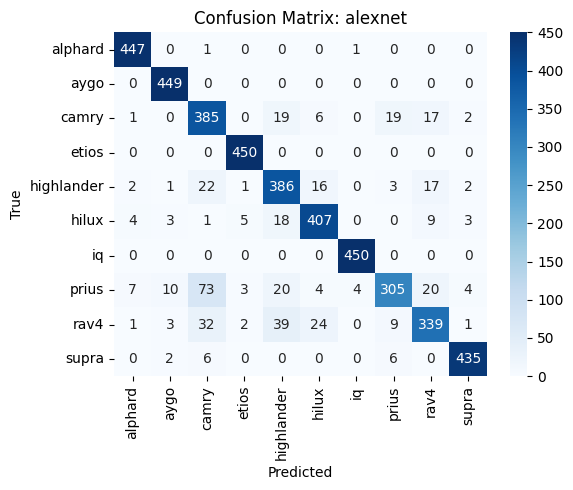


--- vgg ---


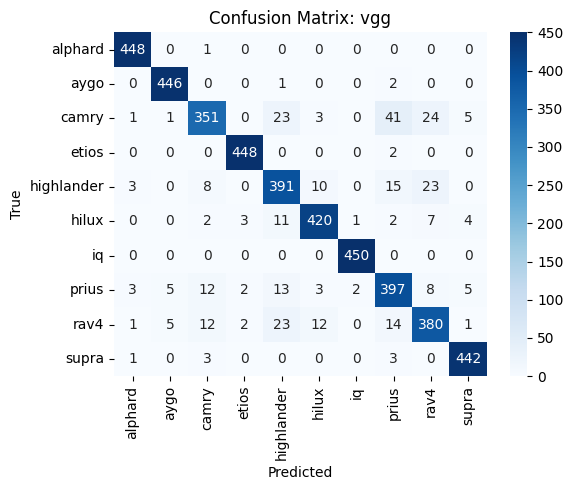


--- myCNN ---


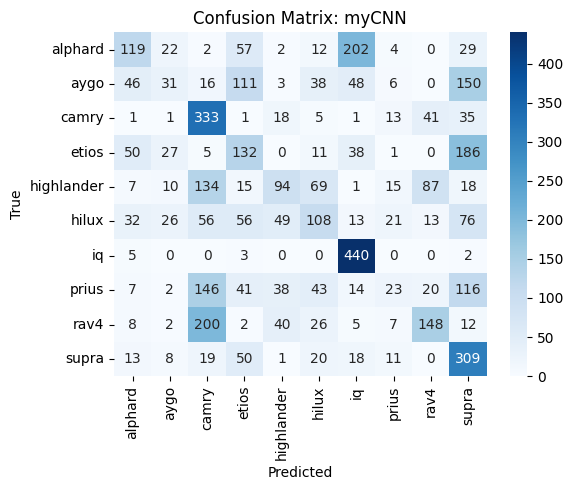


--- vgg+svm ---


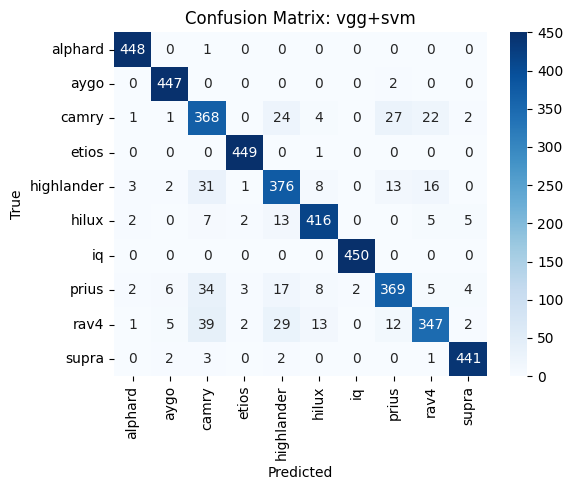

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name, class_names=None):
    print(f"\n--- {model_name} ---")
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    confusion_selected_car_labels = []
    for i , class_ in enumerate(sorted(selected_classes)):
        confusion_selected_car_labels.append(class_)


    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=confusion_selected_car_labels, yticklabels=confusion_selected_car_labels)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()
    return acc, prec, rec, f1


acc1, prec1, rec1, f1_1= evaluate_model(y_test_alexnet, y_pred_alexnet_fc, 'alexnet', class_names=selected_classes)
acc2, prec2, rec2, f1_2= evaluate_model(y_test_vgg, y_pred_vgg_fc, 'vgg', class_names=selected_classes)
acc3, prec3, rec3, f1_3= evaluate_model(y_test_cnn, y_pred_mycnn, 'myCNN', class_names=selected_classes)
acc4, prec4, rec4, f1_4= evaluate_model(t_test_svm, y_pred_svm, 'vgg+svm', class_names=selected_classes)

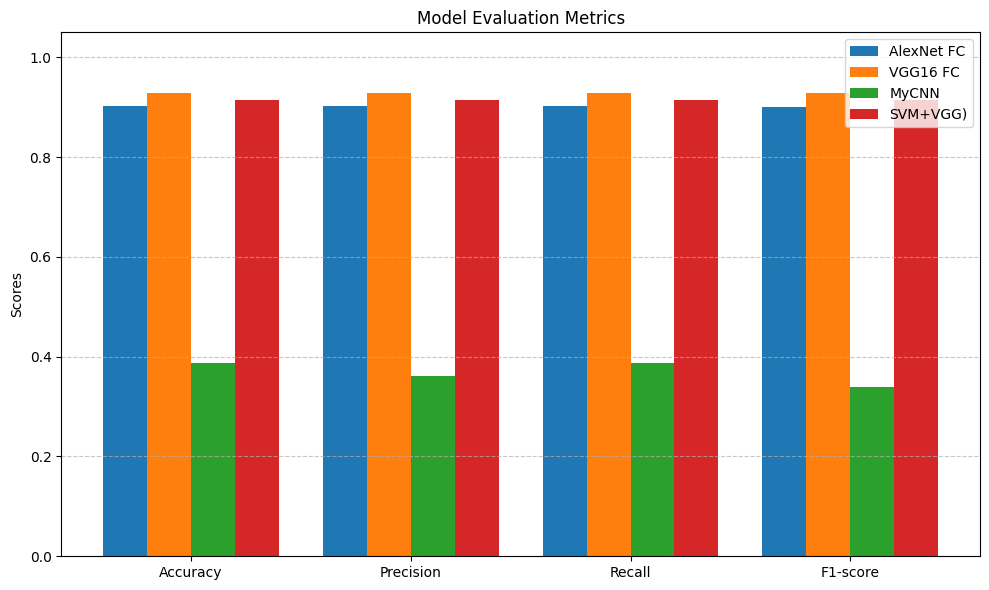

In [25]:
metrics = {
    'AlexNet FC':   (acc1, prec1, rec1, f1_1),
    'VGG16 FC':     (acc2, prec2, rec2, f1_2),
    'MyCNN':        (acc3, prec3, rec3, f1_3),
    'SVM+VGG)':    (acc4, prec4, rec4, f1_4)
}


model_names = list(metrics.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

metric_values = np.array(list(metrics.values()))  

x = np.arange(len(metric_names)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

for i, model_name in enumerate(model_names):
    ax.bar(x + i * width, metric_values[i], width, label=model_name)


ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metric_names)
ax.legend()
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(df)

            Accuracy  Precision    Recall  F1 Score
AlexNet FC  0.901468   0.903208  0.901468  0.900012
VGG16 FC    0.928158   0.928105  0.928158  0.927584
MyCNN       0.386343   0.361225  0.386343  0.339028
SVM+VGG)    0.914368   0.914571  0.914368  0.913895


Saving models:

In [ ]:
save_path = os.path.join('models')
    
os.makedirs(save_path, exist_ok=True)
torch.save(alexnet_fc.state_dict(), 'models/alexnet_fc.pth')
torch.save(vgg_fc.state_dict(), 'models/vgg_fc.pth')
torch.save(mycnn.state_dict(), 'models/mycnn.pth')

import pickle

# Save model
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

Extra Part: check another file for output: HW2_q2_extra.ipynb

In [ ]:
from sklearn.svm import SVC

svm_model_rbf = SVC(kernel='rbf', C=1.0) 
svm_model_rbf.fit(x_train, y_train)

In [ ]:
svm_model_poly = SVC(kernel='poly', C=1.0) 
svm_model_poly.fit(x_train, y_train)

In [ ]:
with open('models/svm_model_rbf.pkl', 'wb') as f:
    pickle.dump(svm_model_rbf, f)

with open('models/svm_model_poly.pkl', 'wb') as f:
    pickle.dump(svm_model_poly, f)

In [ ]:
t_test_svm_rbf = y_test
y_pred_svm_rbf = svm_model_rbf.predict(x_test)

t_test_svm_poly = y_test
y_pred_svm_poly = svm_model_poly.predict(x_test)


acc5, prec5, rec5, f1_5= evaluate_model(t_test_svm_rbf, y_pred_svm_rbf, 'vgg+svm rbf', class_names=selected_classes)
acc6, prec6, rec6, f1_6= evaluate_model(t_test_svm_poly, y_pred_svm_poly, 'vgg+svm poly', class_names=selected_classes)

In [ ]:
metrics = {
    'SVM+VGG linear':    (acc4, prec4, rec4, f1_4),
    'SVM+VGG rbf':    (acc5, prec5, rec5, f1_5),
    'SVM+VGG poly':    (acc6, prec6, rec6, f1_6)
}


model_names = list(metrics.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

metric_values = np.array(list(metrics.values()))  

x = np.arange(len(metric_names)) 
width = 0.2 

fig, ax = plt.subplots(figsize=(10, 6))

for i, model_name in enumerate(model_names):
    ax.bar(x + i * width, metric_values[i], width, label=model_name)


ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(metric_names)
ax.legend()
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(df)